In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/TEH_World_Happiness_2015_2019_Imputed.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness rank   782 non-null    int64  
 2   Happiness Score  782 non-null    float64
 3   GDP per capita   777 non-null    float64
 4   Social support   777 non-null    float64
 5   Healthy life     777 non-null    float64
 6   Freedom          777 non-null    float64
 7   Generosity       777 non-null    float64
 8   Corruption       775 non-null    float64
 9   Year             782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [4]:
data.describe()

,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,777.000000,777.000000,777.000000,777.000000,777.000000,775.000000,782.000000
mean,78.698210,5.379018,0.921942,1.085332,0.616356,0.413736,0.219982,0.126407,2016.993606
std,45.182384,1.127456,0.401937,0.318999,0.244177,0.149757,0.121445,0.105646,1.417364
min,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001990,0.001000,2015.000000
25%,40.000000,4.509750,0.619000,0.871190,0.443000,0.312000,0.133520,0.055000,2016.000000
50%,79.000000,5.322000,0.985000,1.125000,0.649547,0.432453,0.202000,0.092000,2017.000000
75%,118.000000,6.189500,1.238000,1.330000,0.809158,0.531220,0.279920,0.156352,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


In [5]:
data.shape

(782, 10)

In [6]:
data.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     5
Social support     5
Healthy life       5
Freedom            5
Generosity         5
Corruption         7
Year               0
dtype: int64

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [9]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [10]:
data.isnull().sum()

Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     0
Social support     0
Healthy life       0
Freedom            0
Generosity         0
Corruption         0
Year               0
dtype: int64

In [15]:
data.drop(['Happiness rank', 'Happiness Score'], axis=1, inplace=True)

In [16]:
features_columns = ['Country', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption', 'Year']
data_filtered = data[features_columns]

In [17]:
mapped_data = [(row[0], row[1:]) for row in data_filtered.values]

In [18]:
happiness_scores = {}
for country, features in mapped_data:
    happiness_score = sum(features) / len(features)
    happiness_scores[country] = happiness_score

In [19]:
for country, score in happiness_scores.items():
    print(f"{country}: {score}")

Switzerland: 289.1725714285714
Iceland: 289.15614285714287
Denmark: 289.1722857142857
Norway: 289.18757142857146
Canada: 289.15514285714283
Finland: 289.1507142857143
Netherlands: 289.15628571428573
Sweden: 289.15671428571426
New Zealand: 289.1687142857143
Australia: 289.16214285714284
Israel: 289.06771428571426
Costa Rica: 289.0332857142857
Austria: 289.12414285714283
Mexico: 288.9762857142857
United States: 289.0894285714286
Brazil: 288.9742857142857
Luxembourg: 289.1622857142857
Ireland: 289.16785714285714
Belgium: 289.0984285714286
United Arab Emirates: 289.09714285714284
United Kingdom: 289.13471428571427
Oman: 288.48258428571427
Venezuela: 288.9224285714286
Singapore: 289.20799999999997
Panama: 289.0257142857143
Germany: 289.1192857142857
Chile: 289.00685714285714
Qatar: 289.11571428571426
France: 289.0815714285714
Argentina: 288.99885714285716
Czech Republic: 289.0307142857143
Uruguay: 289.04
Colombia: 288.977
Thailand: 289.033
Saudi Arabia: 289.0294285714286
Spain: 289.06085714

In [20]:
import matplotlib.pyplot as plt

In [24]:
sorted_scores = sorted(happiness_scores.items(), key=lambda x: x[1], reverse=True)

In [25]:
top_10_countries = [x[0] for x in sorted_scores[:10]]
top_10_scores = [x[1] for x in sorted_scores[:10]]

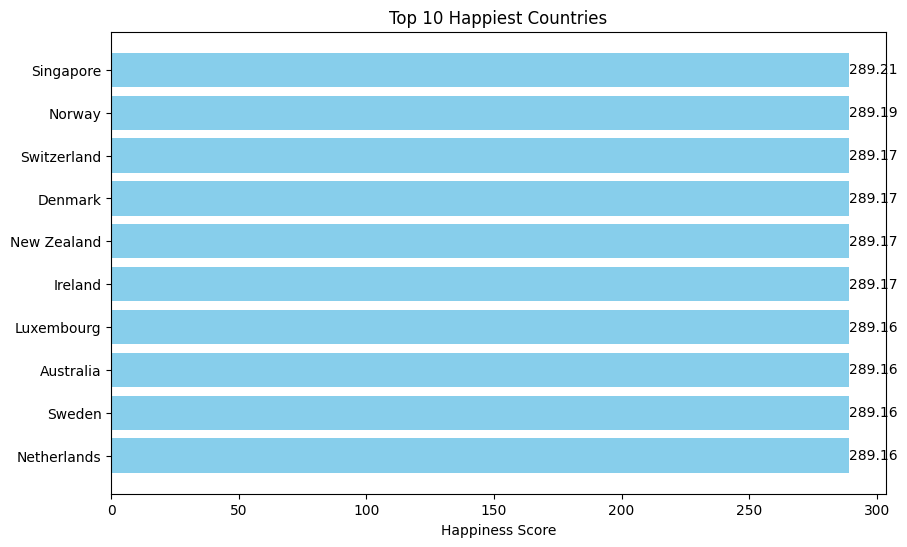

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_countries, top_10_scores, color='skyblue')
for bar, score in zip(bars, top_10_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
             va='center', ha='left', color='black')
plt.xlabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.gca().invert_yaxis()